 # <font color=red> MERCEDES GREENER MANUFACTURING PROJECT</font>

## Agenda

## 1. Importing libraries,Reading in Dataset.
    
    
## 2. Exploratory Data Analysis of Variables


 > **Dealing with Numerical as well as Categorical variables.**<br>
 > **Handling Outliers, Missing and/or Duplicate values.**<br>
 > **Visualize the distributions.**<br>
    
## 3. Data Preprocessing - Feature Selection and Scaling.
    
## 4. Principal Component Analysis for dealing with Curse Of Dimensionality
    
## 5. Evaluating Results on multiple models based on regression metrics - R2 and RMSE.
    
## 6. Hyperparameter Tuning with Gridsearch to finetune performance and results

__*IMPORTING THE LIBRARIES AND LOADING THE DATASETS*__

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.formula.api as sm

 ### IMPORTING THE TRAINING SET
mercedes_train = pd.read_csv('train.csv')
mercedes_train.sample(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3966,7952,115.15,al,o,ae,f,d,w,g,k,...,0,0,0,0,0,0,0,0,0,0
1817,3651,99.99,ay,aa,as,c,d,ae,g,s,...,1,0,0,0,0,0,0,0,0,0
2332,4674,90.78,z,aa,ai,c,d,k,g,n,...,1,0,0,0,0,0,0,0,0,0
2610,5226,89.14,u,m,as,e,d,m,d,e,...,1,0,0,0,0,0,0,0,0,0
248,494,122.69,w,l,ae,f,d,i,g,r,...,1,0,0,0,0,0,0,0,0,0


### Quick check of the shape and structure of Dataset

** Dataset consists of 4209 rows and 378 columns**

In [225]:
print(mercedes_train.shape) ## CHECKING SHAPE OF DATASET
mercedes_train.info( )## BASIC CHECK ON COLUMNS,DATA TYPES ETC

(4209, 378)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


### Descriptive stats of numerical ( categorical binary) and categorical (labelled) variables.

In [313]:
categ_df = mercedes_train.select_dtypes(exclude=[np.number])
numeric_df = mercedes_train.select_dtypes(include=[np.number])

numeric_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
categ_df.describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


# ANALYZING THE TARGET VARIABLE

**Distribution of Testing times**

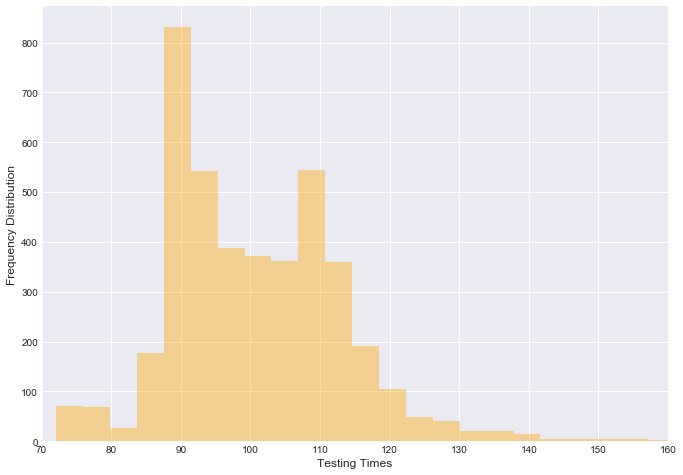

In [229]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.distplot(mercedes_train.y,kde=False,color='orange')
plt.xlim(70,160)
plt.xlabel('Testing Times')
plt.ylabel('Frequency Distribution')

- **In the plot above, we can see that most of the values are centered around the 90-110 range.**
- ** Now, let's check for the presence of outliers in the distribution.**

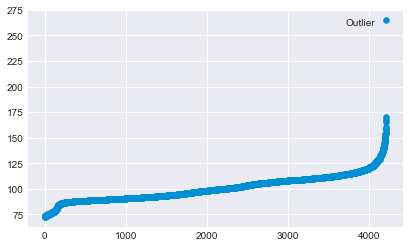

In [230]:
plt.scatter(x=range(len(mercedes_train)),y=sorted(mercedes_train.y))
plt.annotate('Outlier',xy=(3700,260))

- **From the above plot, it is clear that a few values are present in the dataset that are extreme in nature**
- **We will take a closer look below for checking the minimum and maximum values**

## Identifying Outliers

- **Any values that are beyond the value of 3*IQR on either side of the 25 and 75 percentile are considered as Outliers.**
- **IQR is known as the Inter Quartile Range- i.e the difference between the 75 and 25 percentiles.**

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64


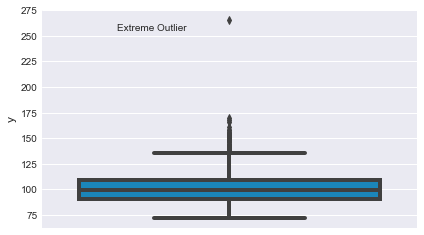

In [231]:
print(mercedes_train.y.describe())
sns.boxplot(y='y',data=mercedes_train)
plt.annotate('Extreme Outlier',xy=(-0.3,255))

In [232]:
mercedes_train.y.describe()
level_25 = mercedes_train.y.describe().loc['25%']
level_75 = mercedes_train.y.describe().loc['75%']
inter_quartile_range = level_75 - level_25
print("Inter Quartile Range :",inter_quartile_range)
upper_limit = level_75 + 3*inter_quartile_range
lower_limit = level_25 -  3*inter_quartile_range
print("Upper Limit: ",upper_limit)
print("Lower Limit: ",lower_limit)

print("Outliers are: \n",mercedes_train['y'][(mercedes_train['y']<lower_limit)|(mercedes_train['y']>upper_limit)])

Inter Quartile Range : 18.190000000000012
Upper Limit:  163.58000000000004
Lower Limit:  36.24999999999996
Outliers are: 
 342     169.91
883     265.32
1459    167.45
3133    165.52
Name: y, dtype: float64


__*Four Outliers are found that falls into the upper end of the 3 x IQR category*__

## INSPECTING CATEGORICAL COLUMNS

### Categorical columns seems to be extremely imbalanced in terms of the distribution of classes.
### We'll plot the classes of each categorical columns to see the distributions.

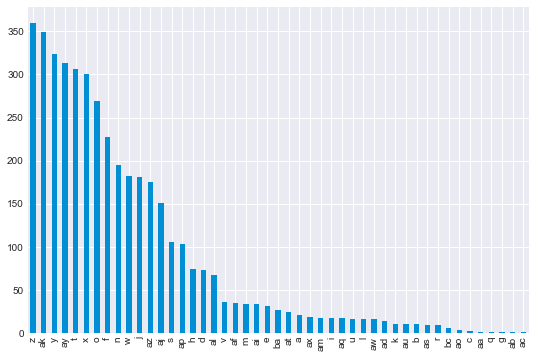

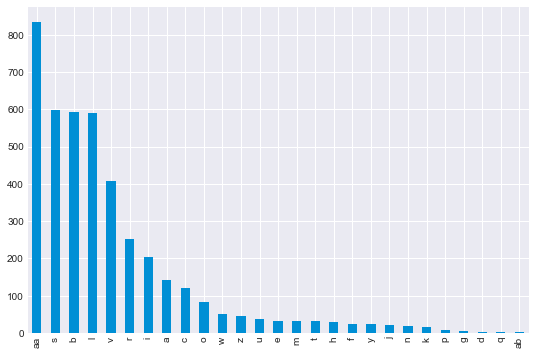

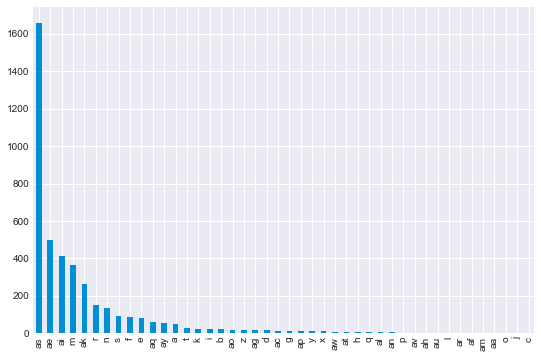

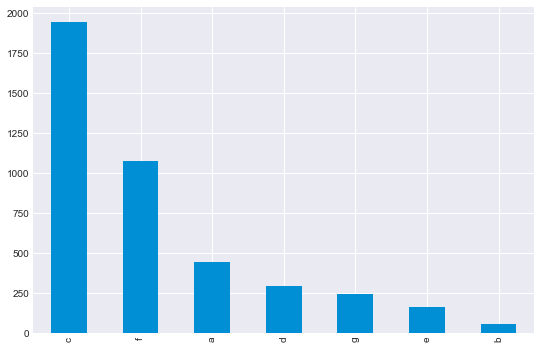

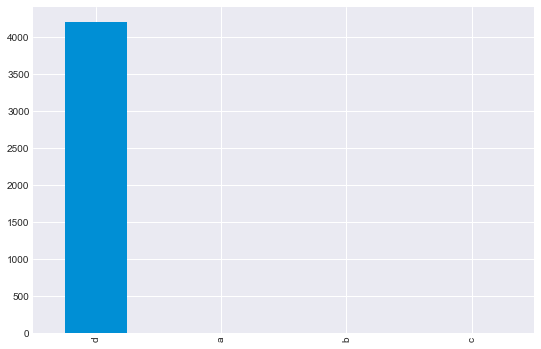

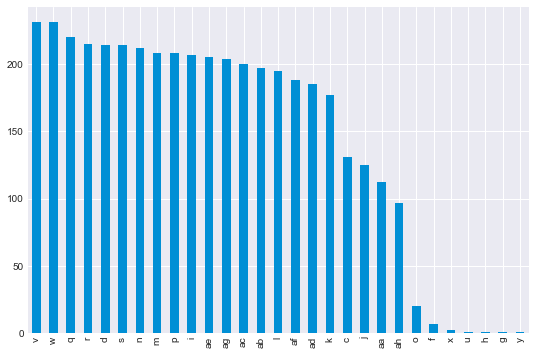

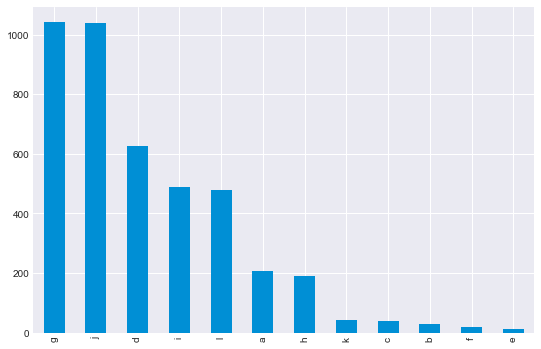

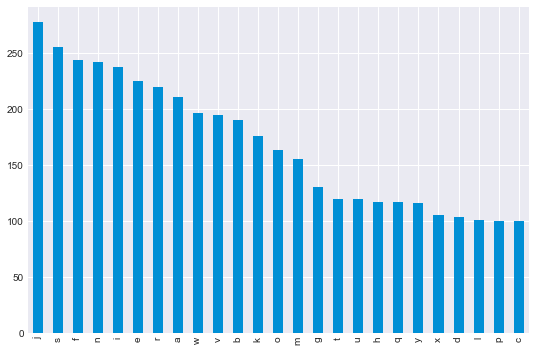

In [233]:
categ_df = mercedes_train.select_dtypes(exclude=[np.number])

for i in list(categ_df.columns):
    plt.figure(figsize=(8,6))
    categ_df[i].value_counts().sort_values(ascending=False).plot.bar()
    plt.show()

** We'll take a closer look at the percentages of total values that the classes occupy in each Categorical column.**
** We have defined a percentage function which will return the series containing classes which contribute to the given percentage(80% here) of the total**

In [234]:
def percentage(df,col,pct):
    n = df[col].nunique()
    for i in range(1,n+1):
        if (sum(df[col].value_counts()[:i]))/(df[col].shape[0]) > pct:
            series = pd.Series(df[col].value_counts()[:i])
            return series
        else:
            continue

In [235]:
for i in list(categ_df.columns):
    print('*'*10+'\n\n')
    ser = percentage(mercedes_train,i,0.80)
    print('Total Classes: ',mercedes_train[i].nunique())
    print(len(ser))
    print(ser)

**********


Total Classes:  47
14
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
Name: X0, dtype: int64
**********


Total Classes:  27
7
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
Name: X1, dtype: int64
**********


Total Classes:  44
7
as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
Name: X2, dtype: int64
**********


Total Classes:  7
3
c    1942
f    1076
a     440
Name: X3, dtype: int64
**********


Total Classes:  4
1
d    4205
Name: X4, dtype: int64
**********


Total Classes:  29
17
v     231
w     231
q     220
r     215
d     214
s     214
n     212
m     208
p     208
i     207
ae    205
ag    204
ac    200
ab    197
l     195
af    188
ad    185
Name: X5, dtype: int64
**********


Total Classes:  12
5
g    1042
j    1039
d     625
i     488
l     478
Name: X6, dtype: int64
**********


Total Classes:  25
18
j    277
s    255
f

## INSPECTING NUMERICAL COLUMNS

- **While checking numerical columns, anomalies with mean and standard deviations as zeros were found in several cases as shown below**

In [236]:
### CHECKING FOR ANOMALIES IN NUMERICAL COLUMNS

null_cols = numeric_df.describe().loc['mean'][numeric_df.describe().loc['mean']==0].index
null_cols = list(null_cols)
print(null_cols)
mercedes_train[null_cols].describe()   ### all values are found to be zeros.

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
count,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## CHECKING FOR MISSING AND DUPLICATE VALUES 

**It's essential that we deal with the Missing and Duplicate values in Dataset before feeding the data to the model.<br>
Else, it will add a lot of unwanted noise and confusion in predicting the values.**

In [237]:
null_ser = mercedes_train.drop('y',axis=1).apply(lambda x: sum(x.isnull()))
sum(null_ser.isnull()) ## CHECKING FOR MISSING VALUES (NONE FOUND)

0

### CHECKING FOR DUPLICATES

**After removing ID and target variable from the dataset, the columns were checked for duplicate values<br>Quite a few of them were noticed inwhich for the same set of values, different testing times were found.<br>This needs to be removed inorder to avoid confusing the model into making incorrect predictions.**

In [238]:
mercedes_train[mercedes_train.drop(['ID','y'],axis=1).duplicated()].sample(5)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
4023,8073,82.44,az,v,n,f,d,w,g,f,...,0,0,0,1,0,0,0,0,0,0
1122,2227,121.03,ap,l,s,c,d,ab,j,n,...,0,0,0,0,0,0,0,0,0,0
2683,5361,86.61,z,b,m,c,d,m,i,j,...,0,0,1,0,0,0,0,0,0,0
4133,8259,105.04,j,r,t,d,d,aa,j,h,...,0,1,0,0,0,0,0,0,0,0
2720,5436,98.84,z,b,m,a,d,m,i,j,...,0,0,1,0,0,0,0,0,0,0


In [239]:
duplicate = set(mercedes_train[mercedes_train.drop(['ID','y'],axis=1).duplicated()].index)
remaining = set(mercedes_train.loc[duplicate].drop(['ID','y'],axis=1).drop_duplicates().index)
rows_to_drop = duplicate.symmetric_difference(remaining)

### CHECKING THE RELATIONSHIP OF ID COLUMN TO TARGET VARIABLE.

          ID         y
ID  1.000000 -0.055108
y  -0.055108  1.000000


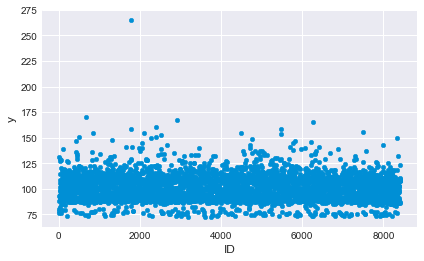

In [240]:
print(mercedes_train[['ID','y']].corr())  ### FINDING CORRELATION WITH ID AND TARGET VARIABLE WITH A VIEW TO DROPPING ID COLUMN.
mercedes_train[['ID','y']].plot(x='ID',y='y',kind='scatter')  ### NONE FOUND. (-0.05). CONFIRMING VIA VISUALIZATION.
plt.show()

As observed, ID column has got hardly any relation with the target variable and can be safely dropped.

## FEATURE ENGINEERING - REMOVAL AND ADDITION OF FEATURES

- **Inorder to encode the Categorical variables and deal with the class imbalance , dummy_encode function is created.** 
- **Classes which form 80% of total are considered and the rest of them are grouped together into 'Other' category.**
- **This approach has led to a reduction of almost 115 columns in the dataset which helps in dealing with the curse of
 dimensionality.**

In [241]:
def dummy_encode(df,cols,imbalance=False,pct=0.80):
    if imbalance:
        for col in list(cols):
            n = df[col].nunique()
            for i in range(1,n+1):
                if (sum(df[col].value_counts()[:i]))/(df[col].shape[0]) > pct:
                    class_lst = list(df[col].value_counts()[:i].index)
                    break
                else:
                    continue
            df[col] = df[col].apply(lambda x: 'Other' if x not in class_lst else x)
        
        cols = df.select_dtypes(exclude=[np.number]).columns
    
    else:
        pass
    
    for col in list(cols):
        dummy = pd.get_dummies(df[col],drop_first=True,prefix=str(col)+'_')
        df = pd.concat([df,dummy],axis=1)
    return df

In [242]:
train_df_all = dummy_encode(mercedes_train,categ_df.columns) ###
train_df_fe = mercedes_train.copy()
train_df_fe = dummy_encode(train_df_fe,categ_df.columns,True)

In [243]:
train_df_all.shape[1]-train_df_fe.shape[1] ## Difference in the number of columns after handling class imbalance.

115

### After the class imbalance and encoding is taken care of, we'll proceed with cleaning the dataset of unwanted columns,both categorical as well as numerical and extreme outliers which can have a detrimental impact on our predictive model.

In [244]:
train_df_dum_encoded_fe = train_df_fe.select_dtypes(include=[np.number]) # filtering labelled columns
train_df_clean  = train_df_dum_encoded_fe.drop('ID',axis=1)       #  Removing ID column from dataset
train_df_clean = train_df_clean[train_df_clean.y<170]             #  Removing Extreme Outlier from dataset
train_df_clean.drop(rows_to_drop,axis=0,inplace=True)             #  Removing 81 duplicate entries from dataset
train_df_clean.drop(null_cols,axis=1,inplace=True)              #  Removing 12 meaningless numerical columns

In [245]:
train_df_clean.shape

(4127, 429)

In [246]:
# SEPARATING THE DATA INTO DEPENDANT AND INDEPENDANT ARRAYS
X = train_df_clean.drop('y',axis=1).values
y = train_df_clean.y

### Feature Scaling the data

In [247]:
X_scaled = StandardScaler().fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Applying PCA

**Even with all the removal of columns and rows, we are still left with 429 features which is signficantly high and the model will suffer from the curse of dimensionality. To tackle this, we have used the Principal Component Analysis technique to obtain the best components that could explain a high percentage of variance in the data.**

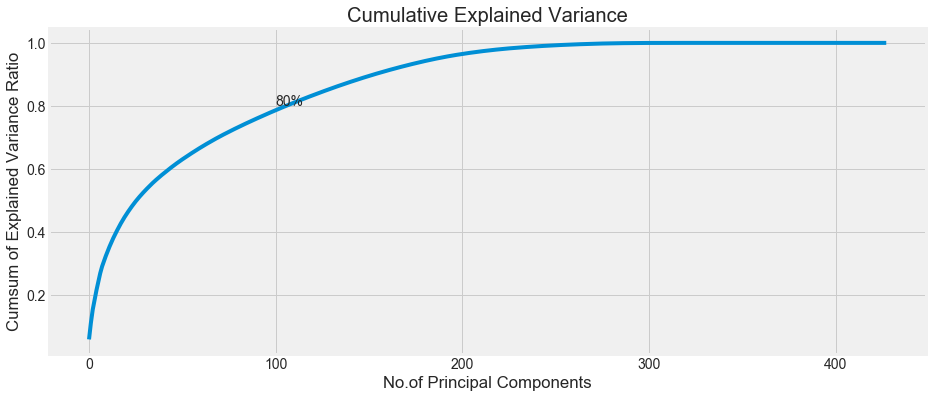

In [248]:
pca = PCA().fit(X_scaled)

## CUMULATIVE EXPLAINED VARIANCE

plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No.of Principal Components")
plt.ylabel("Cumsum of Explained Variance Ratio")
plt.title("Cumulative Explained Variance")
plt.annotate('80%',xy=(100,.80))

- *As shown in the plot above, almost 80% of variance in the model is explained by the first 100 Principal Components which is less than 1/4th of the total.*

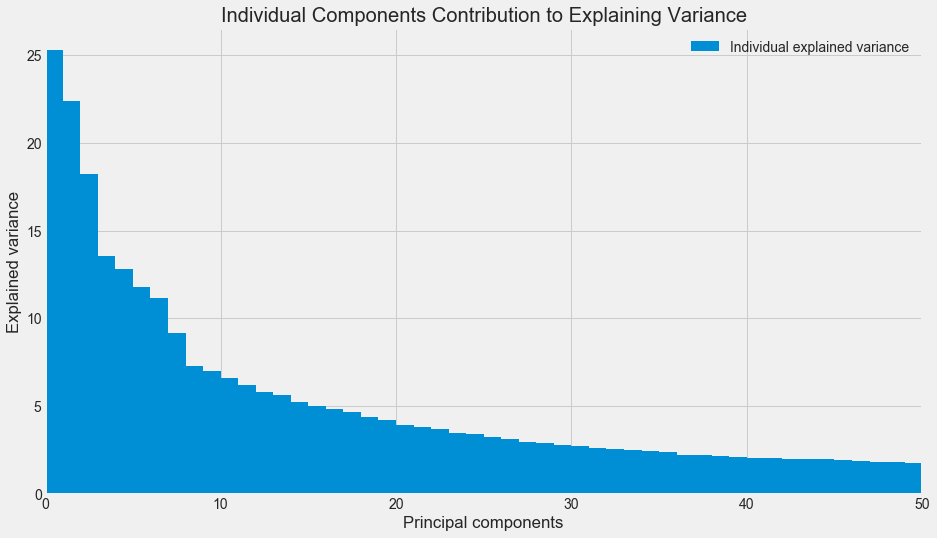

In [249]:
# Individual explained variance
plt.figure(figsize=(14, 8))
plt.bar(range(428), pca.explained_variance_,label='Individual explained variance',width=2)
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.title("Individual Components Contribution to Explaining Variance")
plt.xlim(0,50)
plt.legend(loc='best')

### BEST NUMBER OF PRINCIPAL COMPONENTS BASED ON EVALUATION METRICS
**PCA Check function was created to fit and transform the Scaled X with different values of principal components and evaluating the performance based on training score, test score and RMSE via K Fold Cross Validation.**

In [250]:
def PCA_check(X,n_components,y,model,cv):
    
    X_pca = PCA(n_components).fit_transform(X)
    regressor = model()
    regressor.fit(X_pca,y)
    
    print("\nMean R2 score",cross_val_score(regressor,X_pca,y,cv=cv).mean())
    print("\nMean R2 variance",cross_val_score(regressor,X_pca,y,cv=cv).std())
    print("\nMean RMSE: ",np.sqrt(abs(cross_val_score(regressor,X_pca,y,cv=cv,\
                                                      scoring='neg_mean_squared_error',n_jobs=-1).mean())))

### First, we'll take a look at how Linear Regression Model performs with different number of PCs.

In [251]:
### LINEAR REGRESSION MODEL CHECK 
for i in [1,20,40,45,50,60,100,200,300,428]:
    print("PCA Check for {} components".format(i))
    PCA_check(X_scaled,i,y,LinearRegression,10)
    print('\n'+'*'*100+'\n')

PCA Check for 1 components

Mean R2 score -0.00012997548190937235

Mean R2 variance 0.0111883622852904

Mean RMSE:  12.415640035588153

****************************************************************************************************

PCA Check for 20 components

Mean R2 score 0.41683446369203175

Mean R2 variance 0.05036736339725429

Mean RMSE:  9.52534893738384

****************************************************************************************************

PCA Check for 40 components

Mean R2 score 0.5184919145233039

Mean R2 variance 0.05890876537146937

Mean RMSE:  8.665881061128276

****************************************************************************************************

PCA Check for 45 components

Mean R2 score 0.529813226680264

Mean R2 variance 0.06923939035113089

Mean RMSE:  8.569355960355097

****************************************************************************************************

PCA Check for 50 components

Mean R2 score 0.5383293610469049

**Linear Regressor's Best Model was found to be at around the 50 Principal components mark and the results are**

PCA Check for 50 components

Mean R2 score 0.5232103315715573

Mean R2 variance 0.05272744074187317

Mean RMSE:  8.602351240610249

### Checking for a Non-linear model in Random Forest as well to get the best results

In [252]:
### Random Forest Regressor Model Check
for i in [1,20,40,45,50,60,100]:
    print("PCA Check for {} components".format(i))
    PCA_check(X_scaled,i,y,RandomForestRegressor,10)
    print('\n'+'*'*100+'\n')

PCA Check for 1 components

Mean R2 score -0.2187599732574176

Mean R2 variance 0.0932438091388474

Mean RMSE:  13.79101208876872

****************************************************************************************************

PCA Check for 20 components

Mean R2 score 0.4316098837497636

Mean R2 variance 0.03421172949038336

Mean RMSE:  9.27924188311165

****************************************************************************************************

PCA Check for 40 components

Mean R2 score 0.4537552671450655

Mean R2 variance 0.048165710705290986

Mean RMSE:  9.149258424659575

****************************************************************************************************

PCA Check for 45 components

Mean R2 score 0.4503614243713784

Mean R2 variance 0.043634075610622686

Mean RMSE:  9.157400646738344

****************************************************************************************************

PCA Check for 50 components

Mean R2 score 0.4565642386706495

M

**Taking 10 fold cross validation scores of training set, validaion test set and RMSE into account, **
**best choice of components is 50 (both using Linear and Random Forest Regressors) **

** RE TRANSFORMING SCALED X WITH 50 PRINCIPAL COMPONENTS**

In [253]:
X_best_pca_ = PCA(n_components=50).fit_transform(X_scaled)

# MODELS - TRAINING AND EVALUATION

### Defining GRIDSEARCH Function For Model Evaluation 

In [254]:
def model_evaluate(model,X,y,param_grid,cv=10,output=True):
    regressor = model()
    grid = GridSearchCV(estimator=regressor,param_grid=param_grid,verbose=4,cv=cv,n_jobs=-1)
    grid.fit(X,y)
    print("Best Parameter Combo: ",grid.best_params_)
    print("Best Mean Score on Training Set: ",grid.best_score_)
    if output:
          return grid.best_estimator_

## RANDOM FOREST REGRESSOR 
   ** FINDING THE BEST HYPERPARAMETERS VIA CASCADED GRIDSEARCH **

- The model training was extremely time consuming when all the parameters were passed in one go.  
- To avoid this bottleneck,the best parameters from each set were fine tuned in the next gridsearch to get the best set of hyperparameter values.

In [255]:
rf_param_grid1 = [{'n_estimators': [64,128],'max_depth':[10,15],'min_samples_split':[8,10],'min_samples_leaf':[5,10]}]

rf_best_estimator1 = model_evaluate(RandomForestRegressor,X_best_pca_,y,rf_param_grid1)

rf_best_estimator1

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 17.0min finished


Best Parameter Combo:  {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 128, 'min_samples_split': 8}
Best Mean Score on Training Set:  0.5269760584349665


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [256]:
rf_param_grid2 = [{'n_estimators': [128,256],'max_depth':[5,10],'min_samples_split':[5,8],'min_samples_leaf':[10,15]}]

rf_best_estimator2 = model_evaluate(RandomForestRegressor,X_best_pca_,y,rf_param_grid1)

rf_best_estimator2

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 17.1min finished


Best Parameter Combo:  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 128, 'min_samples_split': 8}
Best Mean Score on Training Set:  0.5272166779170712


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [257]:
rf_param_grid3 = [{'n_estimators': [128],'max_depth':[10],'min_samples_split':[8,10],'min_samples_leaf':[5]}]

rf_best_estimator3 = model_evaluate(RandomForestRegressor,X_best_pca_,y,rf_param_grid3)

rf_best_estimator3

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished


Best Parameter Combo:  {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 512, 'min_samples_split': 8}
Best Mean Score on Training Set:  0.5259823384151685


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## SUPPORT VECTOR REGRESSOR

In [258]:
svr_param_grid1 = [
    {
        'C': [1,10,100], 'kernel': ['rbf','poly','sigmoid'],'gamma':[0.01,0.001]
    }
]

svm_best_estimator1 = model_evaluate(SVR,X_best_pca_,y,svr_param_grid1,cv=10)

svm_best_estimator1

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.5min finished


Best Parameter Combo:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5357602691983416


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [259]:
svr_param_grid2 = [
    {
        'C': [10], 'kernel': ['rbf'],'gamma':[0.001,0.0001]
    }
]

svm_best_estimator2 = model_evaluate(SVR,X_best_pca_,y,svr_param_grid2,cv=10)

svm_best_estimator2

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   41.3s finished


Best Parameter Combo:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5357602691983416


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## KNN REGRESSOR

In [260]:
knn_param_grid1 = {'n_neighbors':[3,7,11],'weights':['uniform','distance'],\
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'metric':['euclidean','minkowski','manhattan']}

knn_best_estimator1 = model_evaluate(KNeighborsRegressor,X_best_pca_,y,knn_param_grid1,cv=10)

knn_best_estimator1

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  8.4min


Best Parameter Combo:  {'n_neighbors': 11, 'weights': 'distance', 'algorithm': 'brute', 'metric': 'manhattan'}
Best Mean Score on Training Set:  0.4831642561578705


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.2min finished


KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='distance')

In [261]:
knn_param_grid2 = {'n_neighbors':[9,11,15,19,23,27,31,35],'weights':['distance'],\
              'algorithm':['auto'],'metric':['euclidean']}

knn_best_estimator2 = model_evaluate(KNeighborsRegressor,X_best_pca_,y,knn_param_grid2,cv=10)

knn_best_estimator2

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished


Best Parameter Combo:  {'n_neighbors': 19, 'weights': 'distance', 'algorithm': 'auto', 'metric': 'euclidean'}
Best Mean Score on Training Set:  0.4853379742842174


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='distance')

### DECISION TREE REGRESSOR

In [263]:
dt_param_grid1 = {'max_depth':[2,5,8],'min_samples_leaf':[5,7,9],'max_features':['auto','sqrt','log2',None],\
                 'criterion':['mse','mae','friedman_mse'],'splitter':['best','random']}

dt_best_model1 = model_evaluate(DecisionTreeRegressor,X_best_pca_,y,dt_param_grid1,cv=10)

dt_best_model1

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 355 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1254 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1647 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 16.6min finished


Best Parameter Combo:  {'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 9, 'splitter': 'best', 'max_depth': 5}
Best Mean Score on Training Set:  0.41685498847746416


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=9,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [264]:
dt_param_grid2 = {'max_depth':[8,10,12,15],'min_samples_leaf':[9,11,13,15],'max_features':[None],\
                 'criterion':['mae','mse'],'splitter':['best']}

dt_best_model2 = model_evaluate(DecisionTreeRegressor,X_best_pca_,y,dt_param_grid2,cv=10)

dt_best_model2

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 15.3min finished


Best Parameter Combo:  {'criterion': 'mse', 'max_features': None, 'min_samples_leaf': 15, 'splitter': 'best', 'max_depth': 8}
Best Mean Score on Training Set:  0.4184508154493024


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=15,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# BEST OF ALL MODELS

- Once the best parameters are picked from each individual model, we can check the performance of the best of each model and compare the results.

In [265]:
def best_model(names,models,X,y,scoring=None):
    
    scores = dict()
    
    for name,model in zip(names,models):

        scores[name] = cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring=scoring).mean()
        
    return sorted(scores.items(),key=lambda x:x[1])

In [266]:
names = ['Random Forest','KNN','SVM','Decision Tree','Linear Regression']
models = [rf_best_estimator1,knn_best_estimator2,svm_best_estimator2,dt_best_model2,LinearRegression()]

r2_scores1 = best_model(names,models,X_best_pca_,y)
rmse_scores1 = best_model(names,models,X_best_pca_,y,scoring='neg_mean_squared_error')

In [267]:
r2_df = pd.DataFrame(r2_scores1,columns=['Model','R2 Score'],index=range(1,6))
rmse_df = pd.DataFrame(list(zip([i for i,v in rmse_scores1],[np.sqrt(abs(v)) for i,v in rmse_scores1])),columns=['Model','RMSE'],index=range(1,6))
final_df = r2_df.merge(rmse_df,on=['Model'],left_index=True)
final_df

,Model,R2 Score,RMSE
1,Decision Tree,0.418369,9.498045
2,KNN,0.485368,8.957261
3,Random Forest,0.526560,8.607764
4,SVM,0.535810,8.531629
5,Linear Regression,0.540798,8.464116


#### In terms of Goodness of Fit or R2 value, SVM and Linear Regression came out on top, Linear Regression  performing surprisingly well after the PCA was done.

## USING AUTOMATIC BACKWARD ELIMINATION FOR FEATURE SELECTION

- **Based on weighted combination of p values and adjusted r2 score**


- ** Once the best results of PCA transformed data was obtained, another technique was tried out to pick the best features from dataset based on the p value and Adjusted R2 value of the features. This combination was used as part of the Backward Elimination technique.**<br>


- ** A function was defined to Automate the Backward Elimination technique. The intuition behind this approach was to first check for p values of all the features in the dataset and removing the one with the highest P value until it was lower than the level of significance set (0.05 chosen). However, on top of the P value approach, the Adjusted R2 value was checked both before and after the removal of the feature and compared. If the Adjusted R2 value after removal dropped by more than 3% than before, then the process was stopped and the list of columns with the highest significance returned. This approach led to decreasing the features to just 43 which could best explain the target variable variations.** <br>


- ** For this, StatsModels library was imported and and the statsmodels.formula.api fitted on the X and y variables.**<br>


- ** X value was appended with an array of ones to compensate for the Constant as unlike Algos this was not taken care of by the Statsmodels library.**

In [269]:
    def BackwardElimination(X,y,SL,weight=0):

        X1 = X.values        
        X1 = np.append(arr=np.ones((X1.shape[0],1)),values=X1,axis=1)
        y1 = y.values
        lst = list(X.columns)
        num_cols = len(X1[0])
        
        for i in range(0,num_cols):
            
            regressor_OLS = sm.OLS(y1,X1).fit()
            max_p = max(regressor_OLS.pvalues.astype(float))
            adj_R = regressor_OLS.rsquared_adj.astype(float)
            
            if max_p > SL :
                
                lst1 = lst.copy()               
                lst1.pop(np.argmax(regressor_OLS.pvalues)-1)
                X2 = np.delete(X1,np.argmax(regressor_OLS.pvalues),1)
                temp_regressor = sm.OLS(y1,X2).fit()
                adj_R_new = temp_regressor.rsquared_adj.astype(float)

                if adj_R_new < adj_R - weight :
                    
                    print(regressor_OLS.summary())
                    return lst
                
                else:
                    
                    X1 = X2    
                    lst = lst1
        
        print(regressor_OLS.summary())
        return lst
    
copy1 = train_df_clean.copy()
X = copy1.drop('y',axis=1)
y = copy1['y']

In [270]:
lst = BackwardElimination(X,y,SL=0.05,weight=0.03)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     154.9
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:21:58   Log-Likelihood:                -14270.
No. Observations:                4127   AIC:                         2.863e+04
Df Residuals:                    4083   BIC:                         2.891e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.4819      5.903     21.088      0.0

In [271]:
print(len(lst))
print(lst)

43
['X15', 'X47', 'X54', 'X75', 'X90', 'X104', 'X115', 'X128', 'X148', 'X163', 'X178', 'X179', 'X181', 'X189', 'X204', 'X210', 'X238', 'X240', 'X249', 'X250', 'X255', 'X261', 'X264', 'X292', 'X315', 'X327', 'X339', 'X348', 'X375', 'X383', 'X0__ak', 'X0__j', 'X0__w', 'X0__x', 'X0__z', 'X3__c', 'X3__f', 'X5__m', 'X5__n', 'X5__r', 'X5__w', 'X6__g', 'X6__j']


*__Automatic Backward Elimination function returned the list of the most significant features in the dataset. Now we will chose these features and drop the rest.__*

In [272]:
X1 = X[lst]
X1_scaled = StandardScaler().fit_transform(X1)

### Linear Regression produced abnormal values as before without PCA.

In [273]:
lin_reg_scores1 = cross_val_score(LinearRegression(),X1,y,n_jobs=-1,cv=10)
print("Linear Regression Score Without Scaling",lin_reg_scores1.mean()) ### without scaling
lin_reg_scores2 = cross_val_score(LinearRegression(),X1_scaled,y,n_jobs=-1,cv=10)
print("Linear Regression Score After Scaling",lin_reg_scores2.mean()) ### without scaling

Linear Regression Score Without Scaling -2.8102853779776383e+20
Linear Regression Score After Scaling -2.3515080089808024e+21


# KNN REGRESSOR

In [274]:
knn_param_grid_abe1 = {'n_neighbors':[5,15,25,35],'weights':['uniform','distance'],\
              'algorithm':['auto', 'ball_tree', 'kd_tree'],'metric':['euclidean','manhattan']}

knn_best_estimator_abe1 = model_evaluate(KNeighborsRegressor,X1_scaled,y,knn_param_grid_abe1,cv=10)

knn_best_estimator_abe1

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.3min finished


Best Parameter Combo:  {'n_neighbors': 35, 'weights': 'uniform', 'algorithm': 'ball_tree', 'metric': 'euclidean'}
Best Mean Score on Training Set:  0.5579439857253883


KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=35, p=2,
          weights='uniform')

In [275]:
knn_param_grid_abe2 = {'n_neighbors':[35,37,39,41,43,45,47],'weights':['uniform'],\
              'algorithm':['ball_tree'],'metric':['euclidean']}

knn_best_estimator_abe2 = model_evaluate(KNeighborsRegressor,X1_scaled,y,knn_param_grid_abe2,cv=10)

knn_best_estimator_abe2

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   56.7s finished


Best Parameter Combo:  {'n_neighbors': 43, 'weights': 'uniform', 'algorithm': 'ball_tree', 'metric': 'euclidean'}
Best Mean Score on Training Set:  0.5591767499691511


KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=43, p=2,
          weights='uniform')

# DECISION TREE REGRESSOR

In [276]:
dt_param_grid_abe1 = {'max_depth':[2,5,8,10],'min_samples_leaf':[3,5,7],'max_features':['auto','log2',None],\
                 'criterion':['mse','mae','friedman_mse'],'splitter':['best','random']}

dt_best_model_abe1 = model_evaluate(DecisionTreeRegressor,X1_scaled,y,dt_param_grid_abe1,cv=10)

dt_best_model_abe1

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 886 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1057 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1278 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1745 tasks      | elapsed:  8.1min


Best Parameter Combo:  {'criterion': 'friedman_mse', 'max_features': 'auto', 'min_samples_leaf': 3, 'splitter': 'best', 'max_depth': 5}
Best Mean Score on Training Set:  0.5716684281836512


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  8.1min finished


DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [277]:
dt_param_grid_abe2 = {'max_depth':[3,4,5,6,7],'min_samples_leaf':[1,2,3,4],'max_features':['auto',None],\
                 'criterion':['mse','friedman_mse'],'splitter':['best']}

dt_best_model_abe2 = model_evaluate(DecisionTreeRegressor,X1_scaled,y,dt_param_grid_abe2,cv=10)

dt_best_model_abe2

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   13.4s finished


Best Parameter Combo:  {'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'best', 'max_depth': 5}
Best Mean Score on Training Set:  0.5729688941961867


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# RANDOM FOREST REGRESSOR

In [278]:
rf_param_grid_abe1 = [{'n_estimators': [64,128,256],'max_depth':[5,8,10],'min_samples_split':[12,14,16],\
                   'min_samples_leaf':[2,5,8]}]

rf_best_estimator_abe1 = model_evaluate(RandomForestRegressor,X1_scaled,y,rf_param_grid_abe1,cv=10)

rf_best_estimator_abe1

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  8.1min finished


Best Parameter Combo:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 64, 'min_samples_split': 16}
Best Mean Score on Training Set:  0.5838508085501704


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [279]:
rf_param_grid_abe2 = [{'n_estimators': [32,64,128],'max_depth':[8],'min_samples_split':[10,12],\
                   'min_samples_leaf':[6,7,8,9]}]

rf_best_estimator_abe2 = model_evaluate(RandomForestRegressor,X1_scaled,y,rf_param_grid_abe2,cv=10)

rf_best_estimator_abe2

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.5min finished


Best Parameter Combo:  {'max_depth': 8, 'min_samples_leaf': 7, 'n_estimators': 64, 'min_samples_split': 12}
Best Mean Score on Training Set:  0.5831779416333828


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [280]:
rf_param_grid_abe3 = [{'n_estimators': [64],'max_depth':[8],'min_samples_split':[8,10],\
                   'min_samples_leaf':[6]}]

rf_best_estimator_abe3 = model_evaluate(RandomForestRegressor,X1_scaled,y,rf_param_grid_abe3,cv=10)

rf_best_estimator_abe3

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.5s finished


Best Parameter Combo:  {'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 64, 'min_samples_split': 8}
Best Mean Score on Training Set:  0.5827599558927896


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# SUPPORT VECTOR REGRESSOR

In [281]:
svr_param_grid_abe1 = [
    {
        'C': [1,10,100], 'kernel': ['rbf','poly','sigmoid'],'gamma':[0.01,0.001]
    }
]

svm_best_estimator_abe1 = model_evaluate(SVR,X1_scaled,y,svr_param_grid_abe1,cv=10)

svm_best_estimator_abe1

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.9min finished


Best Parameter Combo:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5715199016984716


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [282]:
svr_param_grid_abe2 = [
    {
        'C': [50,100,200,500], 'kernel': ['rbf'],'gamma':[0.001,0.0001]
    }
]

svm_best_estimator_abe2 = model_evaluate(SVR,X1_scaled,y,svr_param_grid_abe2,cv=10)

svm_best_estimator_abe2

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.4min finished


Best Parameter Combo:  {'C': 200, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5716925203376825


SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [283]:
svr_param_grid_abe3 = [
    {
        'C': [200], 'kernel': ['rbf'],'gamma':[0.01,0.005,0.001,0.0001,0.0005]
    }
]

svm_best_estimator_abe3 = model_evaluate(SVR,X1_scaled,y,svr_param_grid_abe3,cv=10)

svm_best_estimator_abe3

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


Best Parameter Combo:  {'C': 200, 'gamma': 0.0005, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5719673201236359


SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0005,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# BEST MODELS

In [284]:
names = ['Random Forest','KNN','SVM','Decision Tree','Linear Regression']
models = [rf_best_estimator_abe2,knn_best_estimator_abe2,svm_best_estimator_abe3,dt_best_model_abe2,LinearRegression()]

r2_scores_abe = best_model(names,models,X1_scaled,y)
rmse_scores_abe = best_model(names,models,X1_scaled,y,scoring='neg_mean_squared_error')

In [285]:
r2_df_abe = pd.DataFrame(r2_scores_abe,columns=['Model','R2 Score'],index=range(1,6))
rmse_df_abe = pd.DataFrame(list(zip([i for i,v in rmse_scores_abe],[np.sqrt(abs(v)) for i,v in rmse_scores_abe])),columns=['Model','RMSE'],index=range(1,6))
final_df_abe = r2_df_abe.merge(rmse_df_abe,on=['Model'],left_index=True)
final_df_abe

,Model,R2 Score,RMSE
1,Linear Regression,-3.290863e+21,6.861856e+11
2,KNN,5.592117e-01,8.307875e+00
3,SVM,5.720211e-01,8.200383e+00
4,Decision Tree,5.729063e-01,8.180872e+00
5,Random Forest,5.817378e-01,8.105168e+00


## There was a marked improvement (almost 5%) in the results of most of the models from the previous attempt except for the Linear Regression without PCA.

# PCA TRANSFORMATION AND RESULTS

- We'll check if doing PCA again on these extracted features would help improve results.

In [ ]:
pca_2 = PCA().fit(X1_scaled)

## CUMULATIVE EXPLAINED VARIANCE

plt.figure(figsize=(14,6))
plt.style.use("fivethirtyeight")
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel("No.of Principal Components")
plt.ylabel("Cumsum of Explained Variance Ratio")
plt.title("Cumulative Explained Variance")
plt.annotate('80%',xy=(100,.80))

Around 22 components could explain 80% of variance in the data as shown above

In [ ]:
# Individual explained variance
plt.figure(figsize=(14, 8))
plt.bar(range(43), pca_2.explained_variance_,label='Individual explained variance',width=2)
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.title("Individual Components Contribution to Explaining Variance")
plt.xlim(0,50)
plt.legend(loc='best')

### CHOSING THE BEST PCA.

- The best number of components was found to be 10 for both Linear and Random Forest Models.

In [314]:
### LINEAR REGRESSION MODEL CHECK 
for i in [1,10,15,20,25,30,40,43]:
    print("PCA Check for {} components".format(i))
    PCA_check(X1_scaled,i,y,LinearRegression,10)
    print('\n'+'*'*100+'\n')

PCA Check for 1 components

Mean R2 score 0.028112966958795303

Mean R2 variance 0.014371879569627507

Mean RMSE:  12.242776558449469

****************************************************************************************************

PCA Check for 10 components

Mean R2 score 0.4778201282986643

Mean R2 variance 0.050427352800002545

Mean RMSE:  9.016036234668277

****************************************************************************************************

PCA Check for 15 components

Mean R2 score 0.4562913962444397

Mean R2 variance 0.05735763069575786

Mean RMSE:  9.188091519969596

****************************************************************************************************

PCA Check for 20 components

Mean R2 score 0.4517026861546173

Mean R2 variance 0.0727315922429268

Mean RMSE:  9.244693169482437

****************************************************************************************************

PCA Check for 25 components

Mean R2 score -7.279240618938827

In [315]:
### RANDOM FOREST REGRESSION MODEL CHECK 
for i in [1,10,20,30,40,43]:
    print("PCA Check for {} components".format(i))
    PCA_check(X1_scaled,i,y,RandomForestRegressor,10)
    print('\n'+'*'*100+'\n')

PCA Check for 1 components

Mean R2 score 0.28851384148110704

Mean R2 variance 0.17750572199767847

Mean RMSE:  10.406995971637558

****************************************************************************************************

PCA Check for 10 components

Mean R2 score 0.5045284716604709

Mean R2 variance 0.04760191806714269

Mean RMSE:  8.735719150363382

****************************************************************************************************

PCA Check for 20 components

Mean R2 score 0.4296859267406769

Mean R2 variance 0.14258138384583374

Mean RMSE:  9.271021808993758

****************************************************************************************************

PCA Check for 30 components

Mean R2 score 0.48071023207495056

Mean R2 variance 0.0481127015309537

Mean RMSE:  9.14557668274716

****************************************************************************************************

PCA Check for 40 components

Mean R2 score 0.4904048812659757

M

In [316]:
### RANDOM FOREST REGRESSION MODEL CHECK 
for i in [5,8,10,13,16,18,20]:
    print("PCA Check for {} components".format(i))
    PCA_check(X1_scaled,i,y,RandomForestRegressor,10)
    print('\n'+'*'*100+'\n')

PCA Check for 5 components

Mean R2 score 0.4697950053288502

Mean R2 variance 0.05943605319758529

Mean RMSE:  9.003117318767826

****************************************************************************************************

PCA Check for 8 components

Mean R2 score 0.5185037566352623

Mean R2 variance 0.060741791730453264

Mean RMSE:  8.808356401647675

****************************************************************************************************

PCA Check for 10 components

Mean R2 score 0.49660694667380445

Mean R2 variance 0.05689820346196865

Mean RMSE:  8.892023897177046

****************************************************************************************************

PCA Check for 13 components

Mean R2 score 0.45894478454038745

Mean R2 variance 0.06391222710305666

Mean RMSE:  8.934173363274192

****************************************************************************************************

PCA Check for 16 components

Mean R2 score 0.4790886165871422



### THE PRINCIPAL COMPONENT NUMBER WITH THE BEST RESULTS IS 10 FOR BOTH LINEAR AND RF. 

In [317]:
X1_pca = PCA(n_components=10).fit_transform(X1_scaled)

# KNN REGRESSOR

In [318]:
knn_param_grid_abe_pca1 = {'n_neighbors':[15,19,23],'weights':['uniform','distance'],\
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'metric':['euclidean','minkowski','manhattan']}

knn_best_estimator_abe_pca1 = model_evaluate(KNeighborsRegressor,X1_pca,y,knn_param_grid_abe_pca1,cv=10)

knn_best_estimator_abe_pca1

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.0min finished


Best Parameter Combo:  {'n_neighbors': 19, 'weights': 'uniform', 'algorithm': 'brute', 'metric': 'manhattan'}
Best Mean Score on Training Set:  0.5641699818154449


KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=19, p=2,
          weights='uniform')

In [319]:
knn_param_grid_abe_pca2 = {'n_neighbors':[16,17,18,19,20,21,22],'weights':['uniform'],\
              'algorithm':['auto'],'metric':['manhattan']}

knn_best_estimator_abe_pca2 = model_evaluate(KNeighborsRegressor,X1_pca,y,knn_param_grid_abe_pca2,cv=10)

knn_best_estimator_abe_pca2

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   15.7s finished


Best Parameter Combo:  {'n_neighbors': 21, 'weights': 'uniform', 'algorithm': 'auto', 'metric': 'manhattan'}
Best Mean Score on Training Set:  0.5638288657613164


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=21, p=2,
          weights='uniform')

# DECISION TREE REGRESSOR

In [320]:
dt_param_grid_abe_pca1 = {'max_depth':[2,5,8],'min_samples_leaf':[5,7,9],'max_features':['auto','sqrt','log2',None],\
                 'criterion':['mse','mae','friedman_mse'],'splitter':['best','random']}

dt_best_model1_abe_pca1 = model_evaluate(DecisionTreeRegressor,X1_pca,y,dt_param_grid_abe_pca1,cv=10)

dt_best_model1_abe_pca1

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 895 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1229 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  3.0min finished


Best Parameter Combo:  {'criterion': 'mse', 'max_features': 'sqrt', 'min_samples_leaf': 7, 'splitter': 'best', 'max_depth': 8}
Best Mean Score on Training Set:  0.4794737651701507


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [321]:
dt_param_grid_abe_pca2 = {'max_depth':[6,7,8,9,10],'min_samples_leaf':[6,7,8],'max_features':[None],\
                 'criterion':['mse'],'splitter':['best']}

dt_best_model1_abe_pca2 = model_evaluate(DecisionTreeRegressor,X1_pca,y,dt_param_grid_abe_pca2,cv=10)

dt_best_model1_abe_pca2

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.7s finished


Best Parameter Combo:  {'criterion': 'mse', 'max_features': None, 'min_samples_leaf': 8, 'splitter': 'best', 'max_depth': 7}
Best Mean Score on Training Set:  0.48047318939200206


DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# RANDOM FOREST REGRESSOR

In [322]:
rf_param_grid_abe_pca1 = [{'n_estimators': [128,256],'max_depth':[8,10,13],'min_samples_split':[8,10,12],\
                   'min_samples_leaf':[5,10,15]}]

rf_best_estimator_abe_pca1 = model_evaluate(RandomForestRegressor,X1_pca,y,rf_param_grid_abe_pca1,cv=10)

rf_best_estimator_abe_pca1

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 14.5min finished


Best Parameter Combo:  {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 256, 'min_samples_split': 12}
Best Mean Score on Training Set:  0.5440844558752826


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [323]:
rf_param_grid_abe_pca2 = [{'n_estimators': [64,128],'max_depth':[5,8],'min_samples_split':[3,5,8],\
                   'min_samples_leaf':[1,3,5]}]

rf_best_estimator_abe_pca2 = model_evaluate(RandomForestRegressor,X1_pca,y,rf_param_grid_abe_pca2,cv=10)

rf_best_estimator_abe_pca2

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.6min finished


Best Parameter Combo:  {'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 128, 'min_samples_split': 8}
Best Mean Score on Training Set:  0.5474958636051086


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# SUPPORT VECTOR REGRESSOR

In [324]:
svr_param_grid_abe_pca1 = [
    {
        'C': [1,10,100], 'kernel': ['rbf','poly','sigmoid'],'gamma':[0.01,0.001]
    }
]

svm_best_estimator_abe_pca1 = model_evaluate(SVR,X1_pca,y,svr_param_grid_abe_pca1,cv=10)

svm_best_estimator_abe_pca1

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.8min finished


Best Parameter Combo:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.5461895519972529


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [325]:
svr_param_grid_abe_pca2 = [
    {
        'C': [50,100,150], 'kernel': ['rbf'],'gamma':[0.05,0.01,0.005]
    }
]

svm_best_estimator_abe_pca2 = model_evaluate(SVR,X1_pca,y,svr_param_grid_abe_pca2,cv=10)

svm_best_estimator_abe_pca2

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.9min finished


Best Parameter Combo:  {'C': 50, 'gamma': 0.05, 'kernel': 'rbf'}
Best Mean Score on Training Set:  0.550137614114114


SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [326]:
names = ['Random Forest','KNN','SVM','Decision Tree','Linear Regression']
models = [rf_best_estimator_abe_pca2,knn_best_estimator_abe_pca2,svm_best_estimator_abe_pca2,dt_best_model1_abe_pca2,LinearRegression()]

r2_scores_abe_pca = best_model(names,models,X1_pca,y)
rmse_scores_abe_pca = best_model(names,models,X1_pca,y,scoring='neg_mean_squared_error')

In [327]:
r2_df_abe_pca = pd.DataFrame(r2_scores_abe_pca,columns=['Model','R2 Score'],index=range(1,6))
rmse_df_abe_pca = pd.DataFrame(list(zip([i for i,v in rmse_scores_abe_pca],[np.sqrt(abs(v)) for i,v in rmse_scores_abe_pca])),columns=['Model','RMSE'],index=range(1,6))
final_df_abe_pca = r2_df_abe.merge(rmse_df_abe_pca,on=['Model'],left_index=True)
final_df_abe_pca

,Model,R2 Score,RMSE
1,Linear Regression,-3.290863e+21,9.055015
5,KNN,5.592117e-01,8.262270
4,SVM,5.720211e-01,8.400410
2,Decision Tree,5.729063e-01,8.992355
3,Random Forest,5.817378e-01,8.407072


## Results didn't improve much although it didn't deteriorate either with using just 10 PCs!

# TEST DATA SUBMISSION

### In total, three submissions were made on Kaggle under Mercedes Competition. The criteria for ranking was R2 Score.The approaches used for preprocessing of data for the three different submissions were

**1. Data Cleaning (Feature selection and Class imbalance Sorting) followed by PCA. SVM Model had the highest score in training and hence was used for prediction.This was the benchmark model which had a
   score of 0.27726.**
    
**2. Data Cleaning followed by Automatic Backward Elimination method and scaling. The best estimator in this case was Random Forest Model in the training phase and was used for the predictions.**

  **The model returned a score of 0.54369 on the Private Leadership Board (highest score was 0.55550).**
    
**3. Data Cleaning then Automatic Backward Elimination and scaling followed by PCA. Again, Random Forest estimator was used for predicting the test set and the predictions returned a score of 41.236**

In [297]:
def preprocessing_abe_pca(file):
    
    mercedes_train = pd.read_csv(file)
    categ_df = mercedes_train.select_dtypes(exclude=[np.number])
    numeric_df = mercedes_train.select_dtypes(include=[np.number])
    
    train_df_fe = mercedes_train.copy()
    train_df_fe = dummy_encode(train_df_fe,categ_df.columns,True)
    train_df_dum_encoded_fe = train_df_fe.select_dtypes(include=[np.number])
       
    train_df_clean  = train_df_dum_encoded_fe.drop('ID',axis=1)        #  Removing ID column from dataset
    X = train_df_clean[lst]                                           # Selecting the best feature columns
    X_scaled = StandardScaler().fit_transform(X)                    # Feature Scaling
    X_scaled_pca = PCA_fit(X_scaled,n_components=10)                # PCA transforming data with 10 components.
    return X_scaled_pca

In [298]:
def preprocessing_abe(file):
    
    mercedes_train = pd.read_csv(file)
    categ_df = mercedes_train.select_dtypes(exclude=[np.number])
    numeric_df = mercedes_train.select_dtypes(include=[np.number])
    
    train_df_fe = mercedes_train.copy()
    train_df_fe = dummy_encode(train_df_fe,categ_df.columns,True)
    train_df_dum_encoded_fe = train_df_fe.select_dtypes(include=[np.number])
       
    train_df_clean  = train_df_dum_encoded_fe.drop('ID',axis=1)        #  Removing ID column from dataset
    X = train_df_clean[lst]                                           # Selecting the best feature columns
    X_scaled = StandardScaler().fit_transform(X)                    # Feature Scaling
    return X_scaled

In [299]:
def preprocessing_pca(file):
    
    mercedes_train = pd.read_csv(file)
    categ_df = mercedes_train.select_dtypes(exclude=[np.number])
    numeric_df = mercedes_train.select_dtypes(include=[np.number])
    
    train_df_fe = mercedes_train.copy()
    train_df_fe = dummy_encode(train_df_fe,categ_df.columns,True)
    train_df_dum_encoded_fe = train_df_fe.select_dtypes(include=[np.number])
       
    train_df_clean  = train_df_dum_encoded_fe.drop('ID',axis=1)        #  Removing ID column from dataset
    X_scaled = StandardScaler().fit_transform(train_df_clean)                    # Feature Scaling
    X_scaled_pca = PCA(n_components=50).fit_transform(X_scaled)
    return X_scaled_pca

In [300]:
def submission(preprocessing,estimator):
    test_df = pd.read_csv('test.csv')
    test_X = preprocessing('test.csv')
    predictions_df = pd.DataFrame()
    predictions_df['ID'] = test_df.ID
    predictions_df['y'] = estimator.predict(test_X)
    return predictions_df

In [307]:
results_abe_pca = submission(preprocessing_abe_pca,rf_best_estimator_abe_pca2)
results_abe = submission(preprocessing_abe,rf_best_estimator_abe3)
results_pca = submission(preprocessing_pca,svm_best_estimator2)